In [15]:
##PREDICTIVE MAINTENANCE 
import pandas as pd
pd.set_option('display.max_rows', None)  # Show all rows for variable understanding
pd.set_option('display.max_columns', None)  # Show all columns for variable understanding

#Specifinge path to CSV file
file_path = '-'

#Load dataset file into a pandas DataFrame
df_merged = pd.read_csv(file_path)

df_mergedColumnAnalysis = pd.DataFrame({"columns": df_merged.columns,
                                 "data Type": df_merged.dtypes.values,
                                 "Total Count": df_merged.count().values,
                                 "Unique Count": df_merged.nunique().values
                                })
df_mergedColumnAnalysis

,columns,data Type,Total Count,Unique Count
0,Turbine_ID,float64,125277,4
1,Timestamp,object,125277,33461
2,Gen_RPM_Max,float64,125277,9368
3,Gen_RPM_Min,float64,125277,8734
4,Gen_RPM_Avg,float64,125277,12981
5,Gen_RPM_Std,float64,125277,4707
6,Gen_Bear_Temp_Avg,float64,125277,76
7,Gen_Phase1_Temp_Avg,float64,125277,127
8,Gen_Phase2_Temp_Avg,float64,125277,120
9,Gen_Phase3_Temp_Avg,float64,125277,118


In [16]:
#Convert the 'Timestamp' column to datetime format
df_merged['Timestamp'] = pd.to_datetime(df_merged['Timestamp'])

#Converting 'Timestamp' column as it is time-series data to use in ML
df_merged['month'] = df_merged['Timestamp'].dt.month
df_merged['day'] = df_merged['Timestamp'].dt.day
df_merged['hour'] = df_merged['Timestamp'].dt.hour
df_merged['minute'] = df_merged['Timestamp'].dt.minute
df_merged['second'] = df_merged['Timestamp'].dt.second

In [17]:
#Drop the 'Timestamp' column
df_merged.drop('Timestamp', axis=1, inplace=True)

Mean Squared Error: 62.34137965601028
R^2 Score: 0.9737697211146816


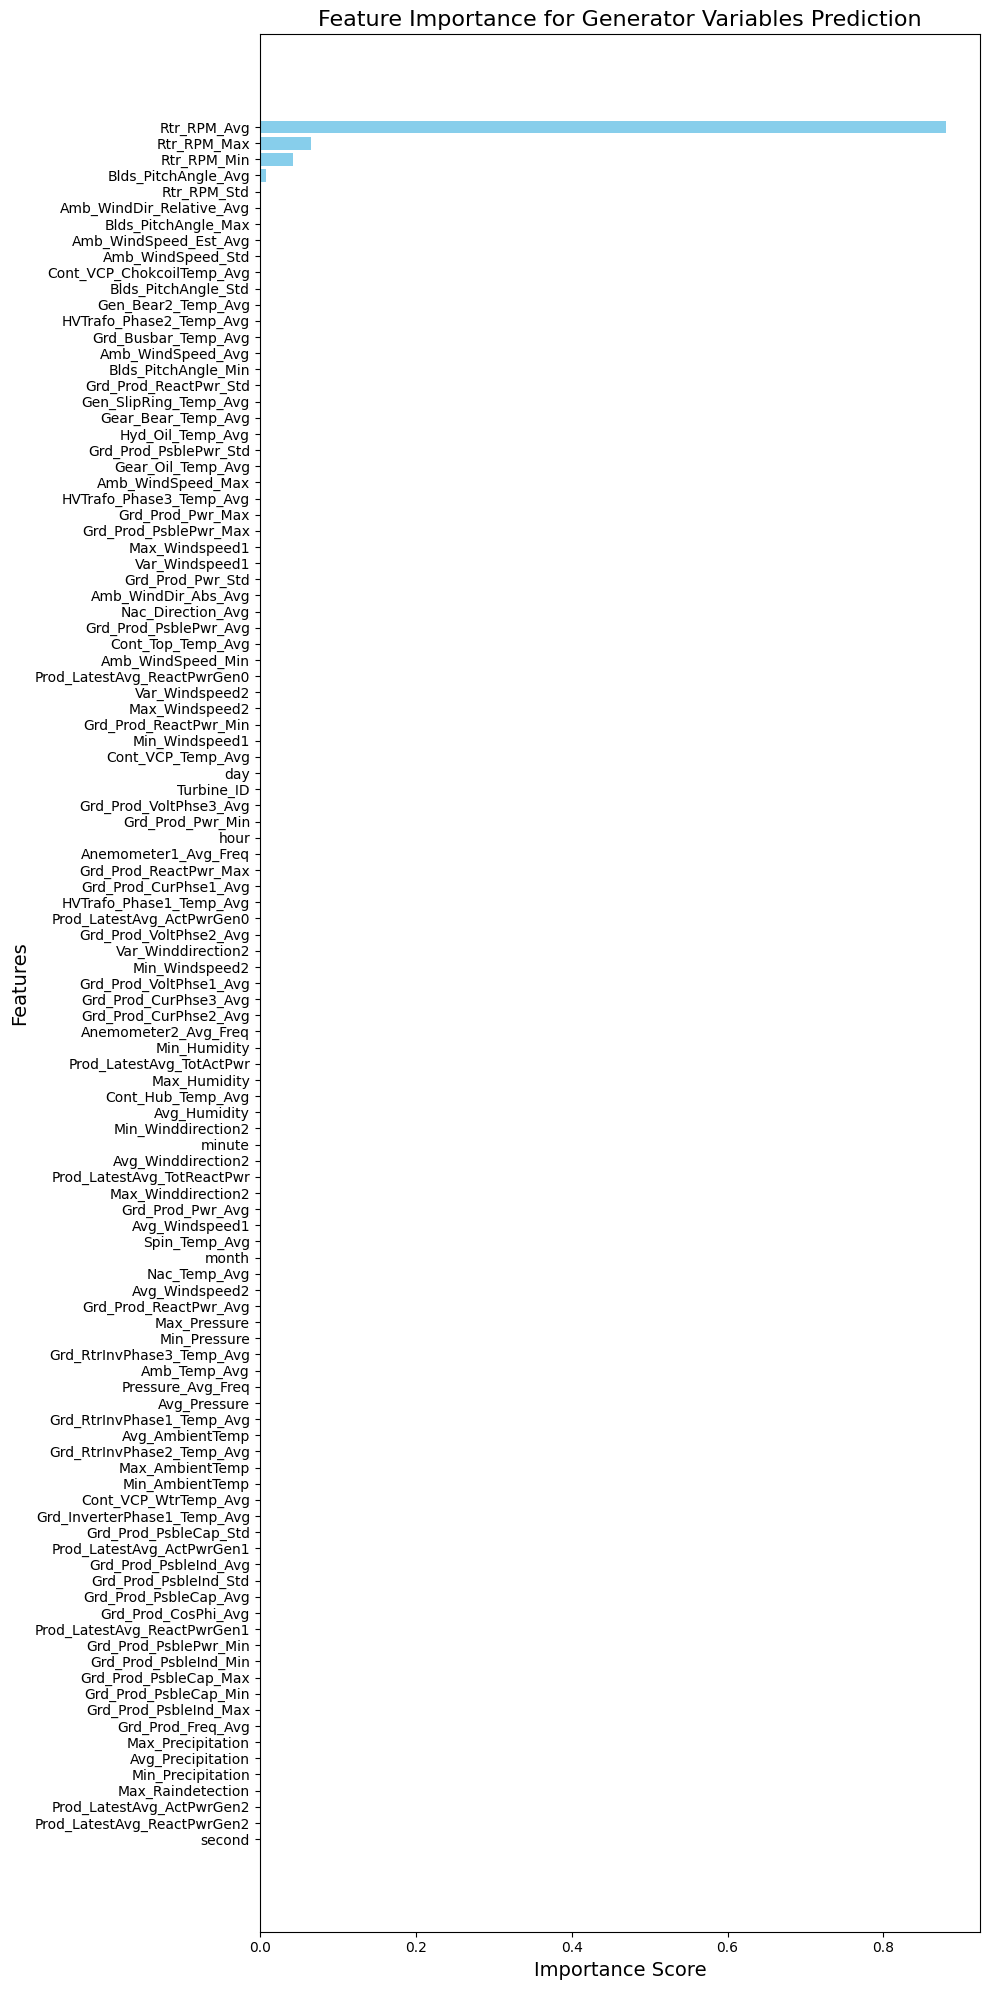

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Target columns for prediction
target_columns = [
    'Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg', 'Gen_Phase2_Temp_Avg',
    'Gen_Phase3_Temp_Avg', 'Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg', 'Gen_RPM_Std'
]

features = df_merged.drop(columns=target_columns)

targets = df_merged[target_columns]

#Training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

#Initialising the RandomForest Regressor.
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

predictions = rf_regressor.predict(X_test)

#Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

importances = rf_regressor.feature_importances_

# Convert the importances into a DataFrame 
feature_importances = pd.DataFrame({'feature': features.columns, 'importance': importances})

#Sort the DataFrame to find the most important features
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

#Plot feature importances.
plt.figure(figsize=(10, 20))  
plt.title('Feature Importance for Generator Variables Prediction', fontsize=16)
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.gca().invert_yaxis() 
plt.tight_layout()  
plt.show()


Mean Squared Error: 0.9603557710727821
R^2 Score: 0.9758928538856201


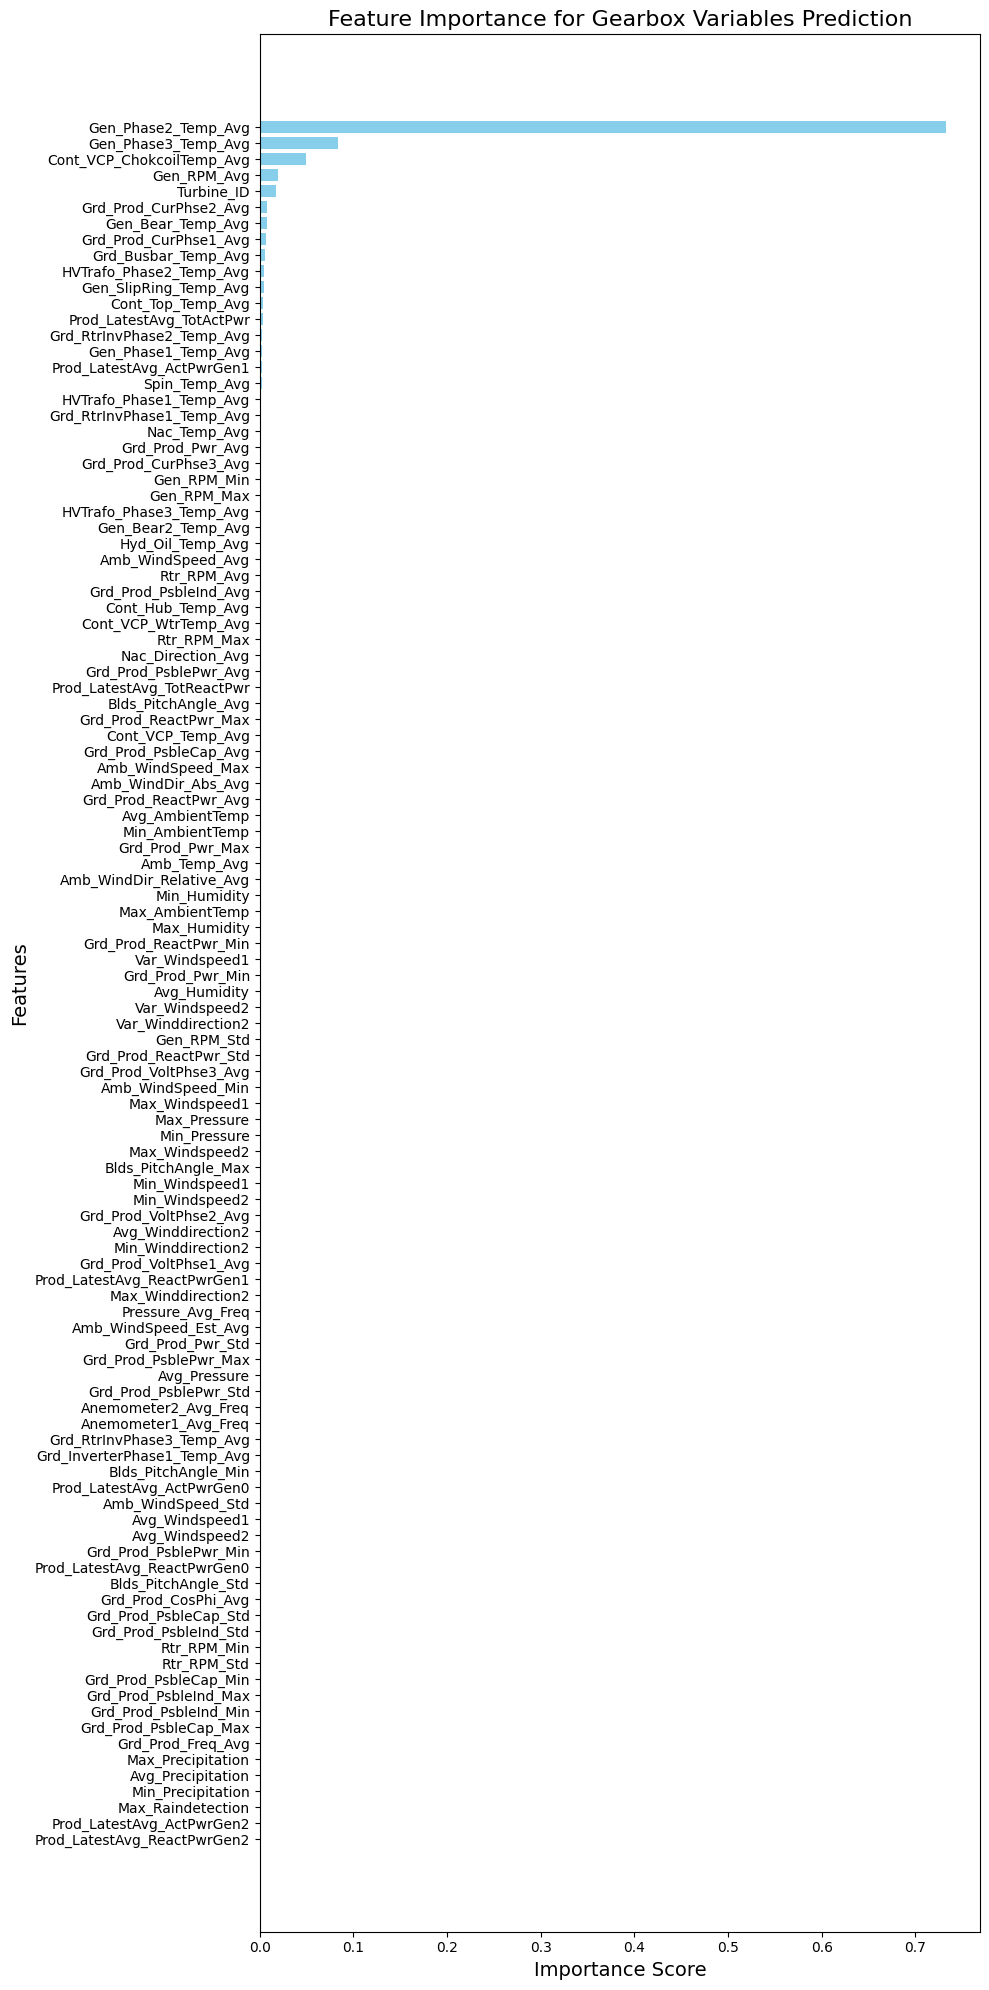

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#For Gearbox
#Target variables for prediction
targets = df_merged[['Gear_Oil_Temp_Avg', 'Gear_Bear_Temp_Avg']]

features = df_merged.drop(columns=targets.columns)

#Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

#Initialising the RandomForest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

predictions = rf_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

importances = rf_regressor.feature_importances_

# Convert the importances into a DataFrame 
feature_importances = pd.DataFrame({'feature': features.columns, 'importance': importances})

#Sort the DataFrame to find the most important features
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

#Plot feature importances.
plt.figure(figsize=(10, 20))  
plt.title('Feature Importance for Gearbox Variables Prediction', fontsize=16)
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.gca().invert_yaxis() 
plt.tight_layout() 
plt.show()


Mean Squared Error: 0.003093273906449471
R^2 Score: 0.9998917693118227


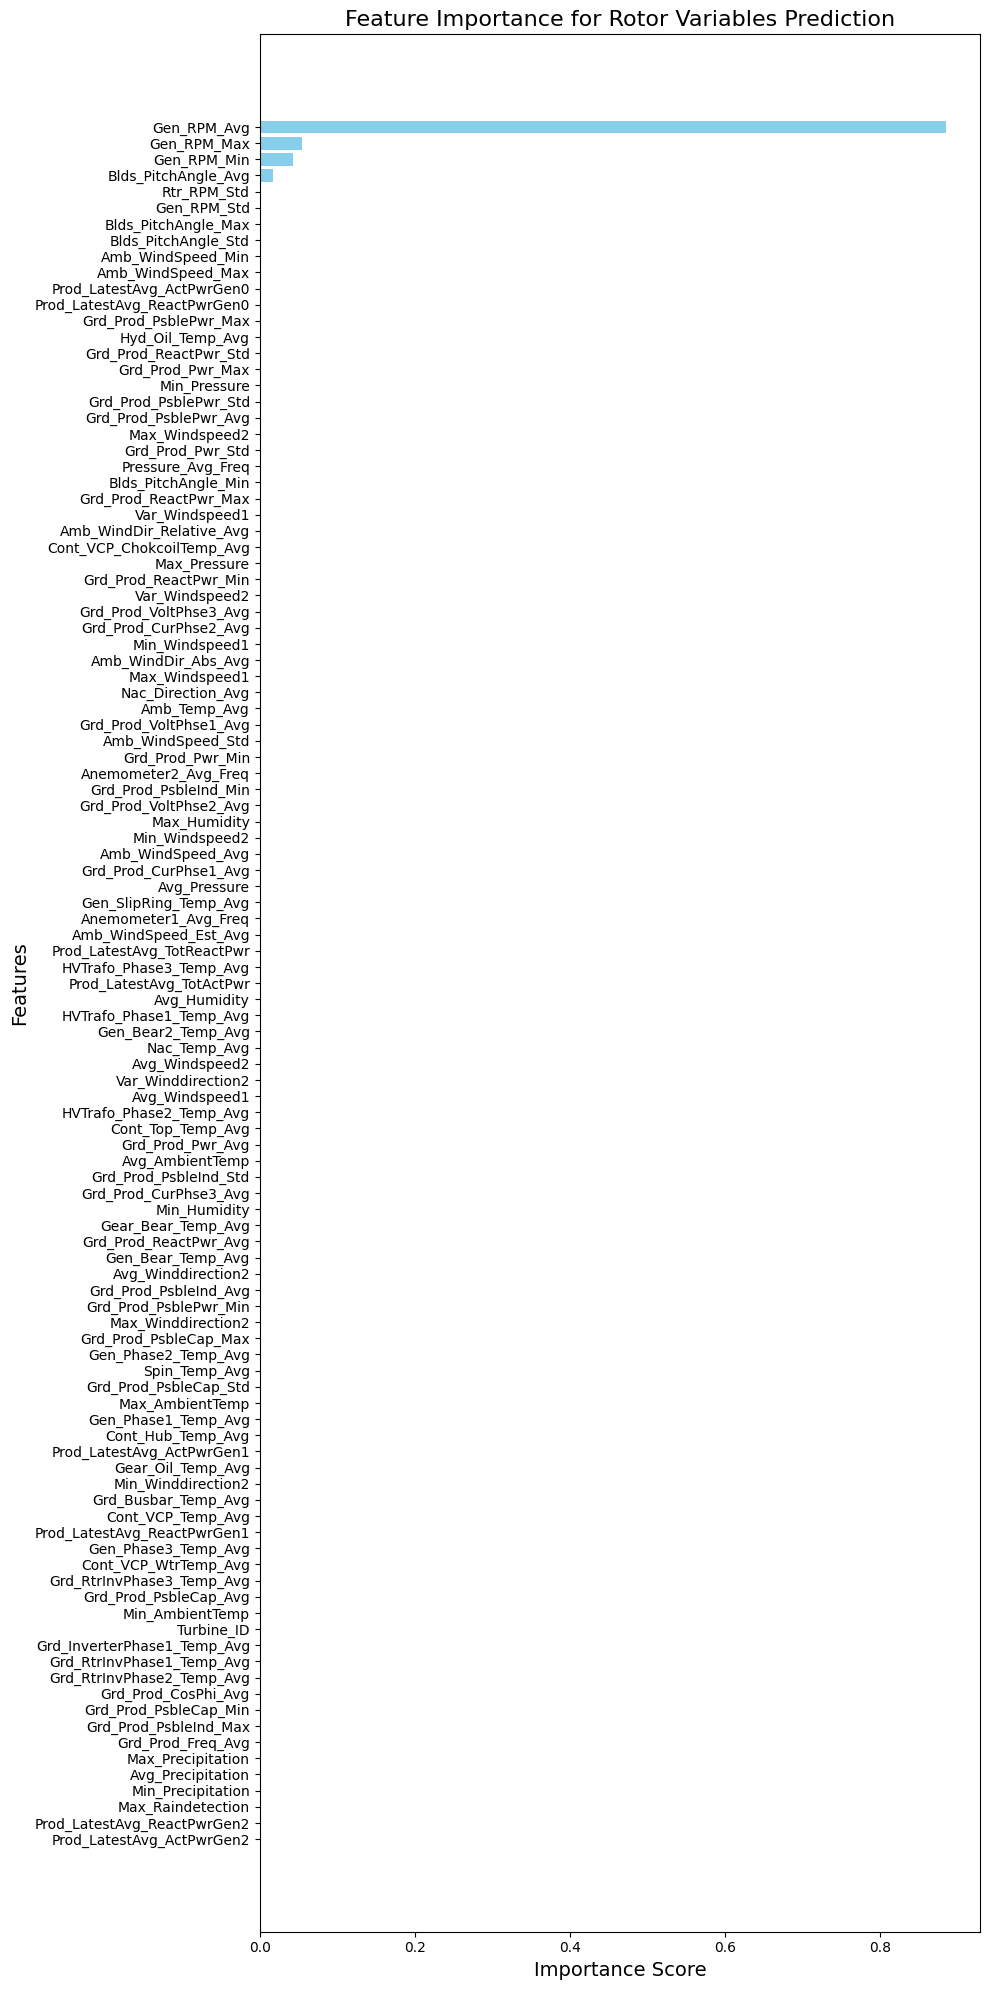

In [10]:
#For Rotor
#Target variables for prediction
targets = df_merged[['Rtr_RPM_Max', 'Rtr_RPM_Min', 'Rtr_RPM_Avg']]

features = df_merged.drop(columns=targets.columns)

#Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

#Initialising the RandomForest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

predictions = rf_regressor.predict(X_test)

#Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

importances = rf_regressor.feature_importances_

# Convert the importances into a DataFrame 
feature_importances = pd.DataFrame({'feature': features.columns, 'importance': importances})

#Sort the DataFrame to find the most important features
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

#Plot feature importances.
plt.figure(figsize=(10, 20))  # Increase the figure size (width, height) as needed.
plt.title('Feature Importance for Rotor Variables Prediction', fontsize=16)
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.gca().invert_yaxis()  
plt.tight_layout()  
plt.show()


Mean Squared Error: 0.3674801058961254
R^2 Score: 0.9892007972666975


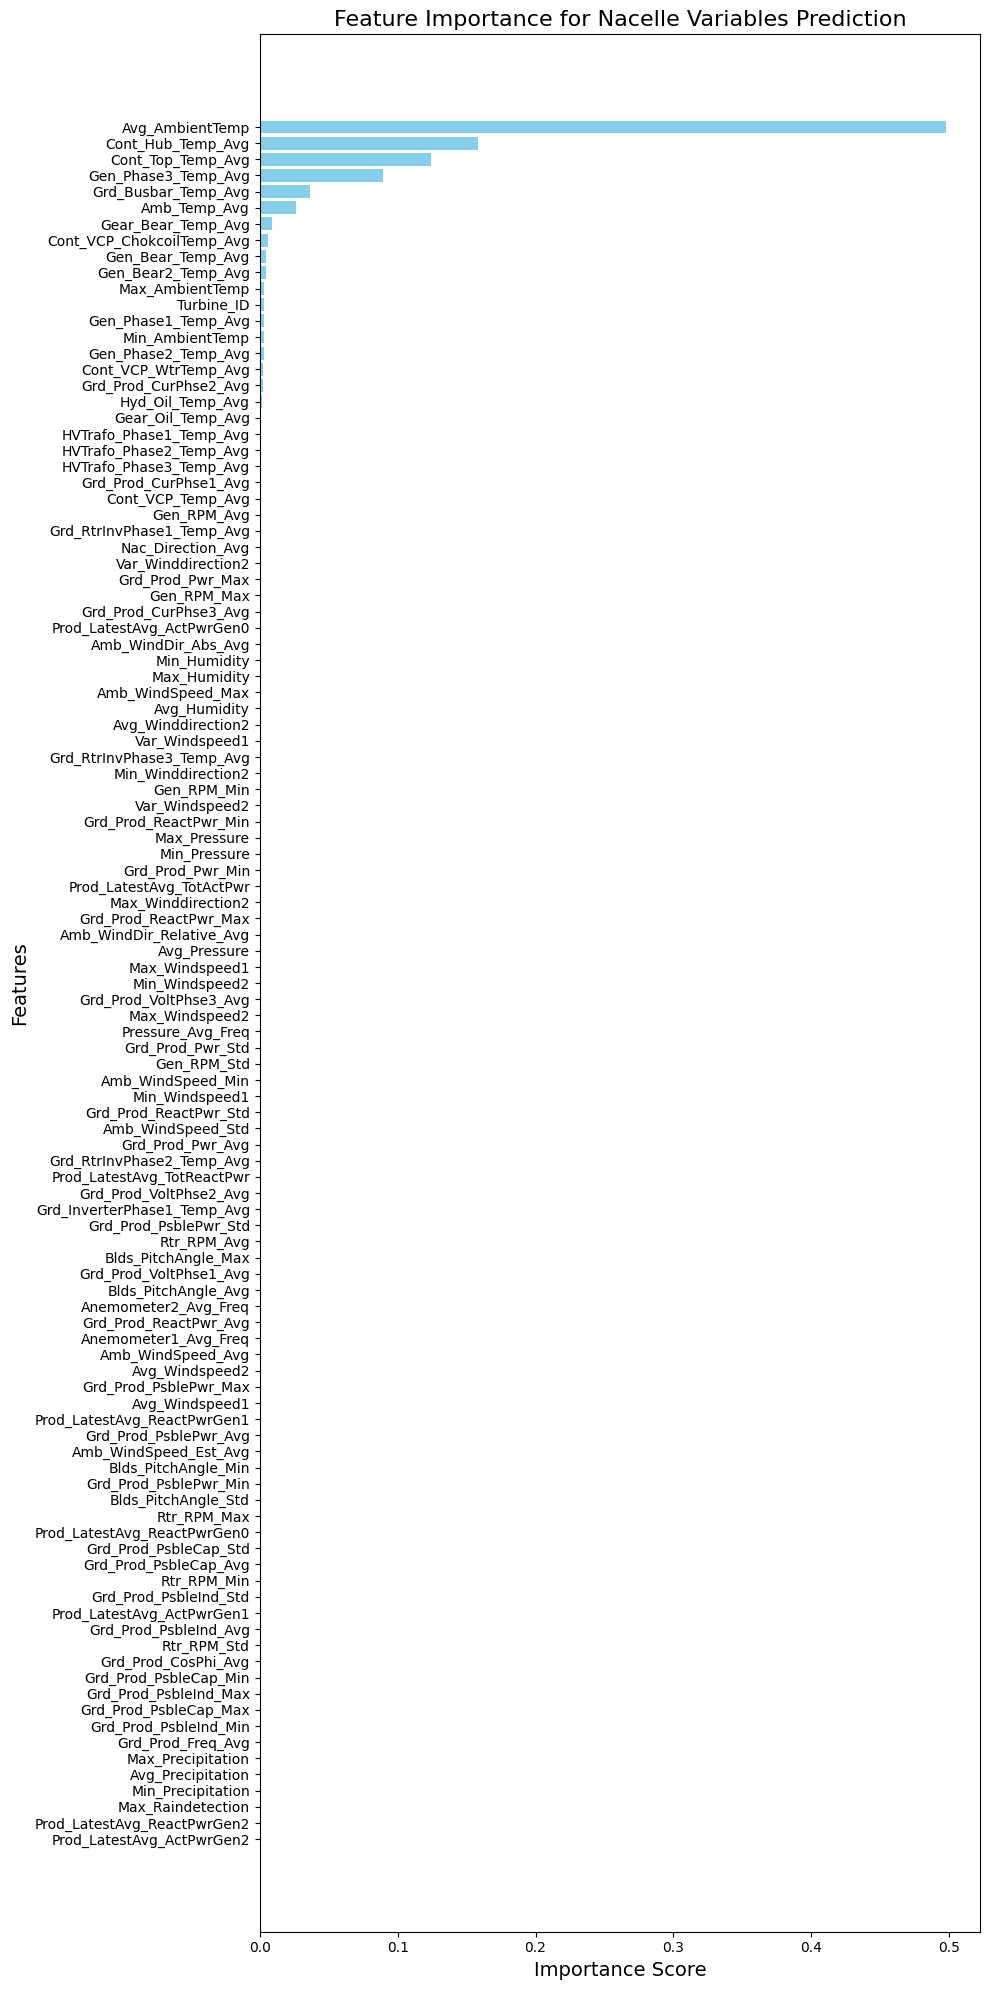

In [11]:
#For Nacelle
#Target variables for prediction
targets = df_merged[['Nac_Temp_Avg','Gen_SlipRing_Temp_Avg', 'Spin_Temp_Avg']]

features = df_merged.drop(columns=targets.columns)

#Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

#Initialising the RandomForest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

predictions = rf_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

importances = rf_regressor.feature_importances_

#Convert the importances into a DataFrame 
feature_importances = pd.DataFrame({'feature': features.columns, 'importance': importances})

#Sort the DataFrame to find the most important features
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

#Plot feature importances.
plt.figure(figsize=(10, 20))  
plt.title('Feature Importance for Nacelle Variables Prediction', fontsize=16)
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.gca().invert_yaxis()  
plt.tight_layout()  
plt.show()


Mean Squared Error: 1.2680979246487867
R^2 Score: 0.9684907310334283


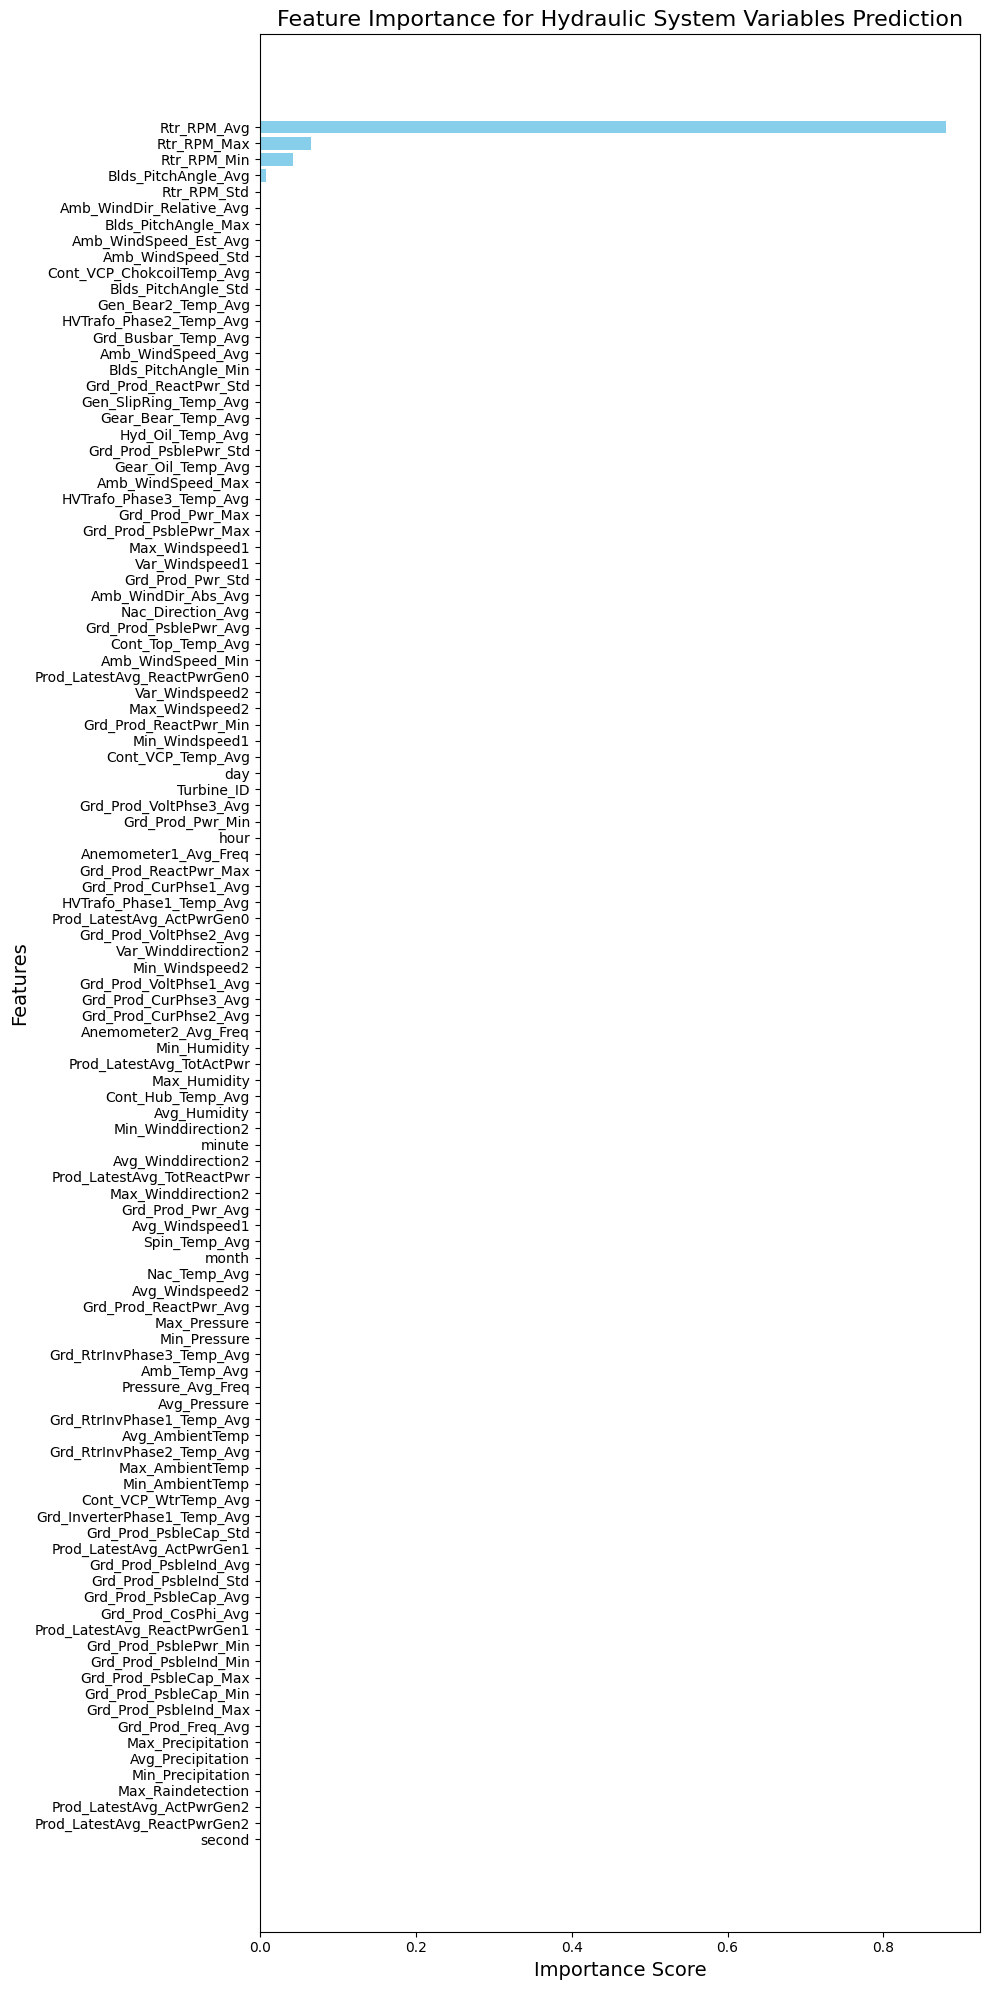

In [19]:
#For Hydraulic System

X = df_merged.drop(columns=['Hyd_Oil_Temp_Avg'])
y = df_merged['Hyd_Oil_Temp_Avg'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialising a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)  

predictions = model.predict(X_test)

#Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

importances = rf_regressor.feature_importances_

#Convert the importances into a DataFrame 
feature_importances = pd.DataFrame({'feature': features.columns, 'importance': importances})

#Sort the DataFrame to find the most important features
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

#Plot feature importances.
plt.figure(figsize=(10, 20))  
plt.title('Feature Importance for Hydraulic System Variables Prediction', fontsize=16)
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.gca().invert_yaxis()  
plt.tight_layout()  
plt.show()


Mean Squared Error: 1.7494691895867338
R^2 Score: 0.9837577757999966


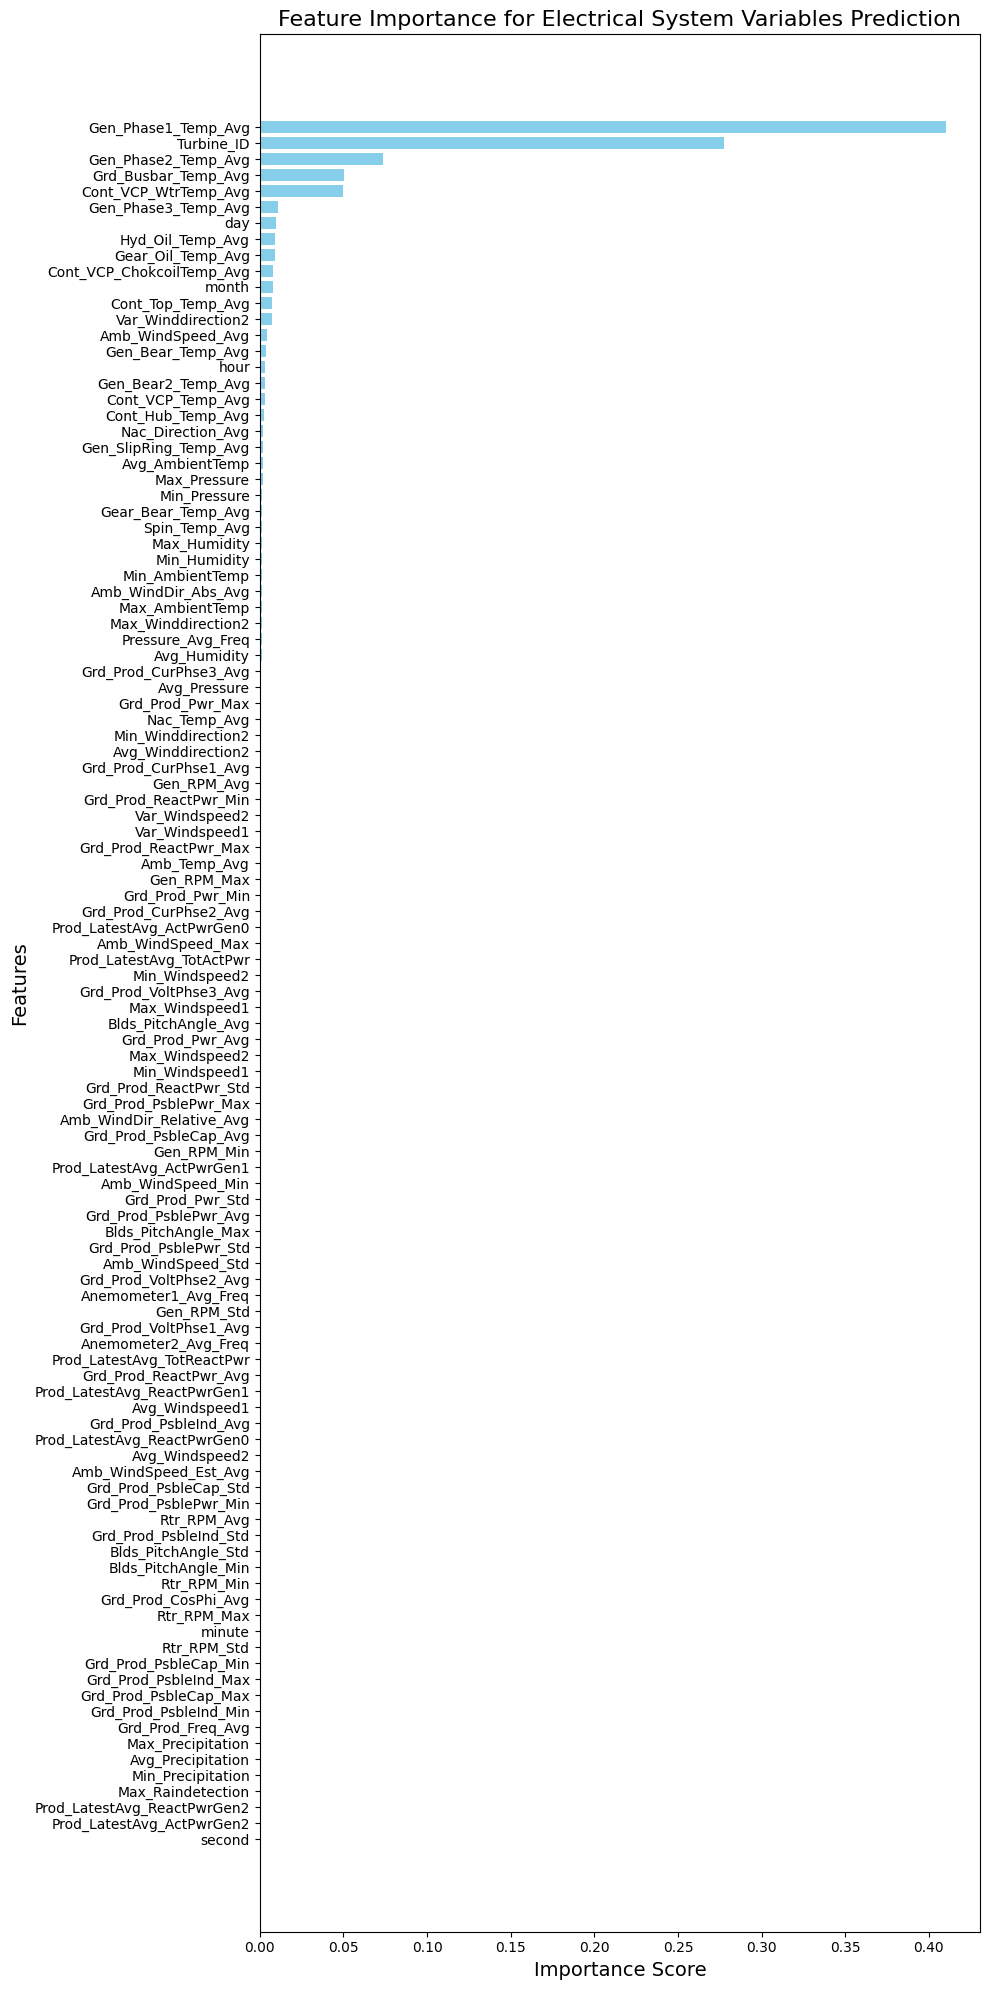

In [20]:
#For Electrical System
#Target variables for prediction
targets = df_merged[['HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg', 'HVTrafo_Phase3_Temp_Avg',
                     'Grd_InverterPhase1_Temp_Avg', 'Grd_RtrInvPhase1_Temp_Avg', 
                     'Grd_RtrInvPhase2_Temp_Avg', 'Grd_RtrInvPhase3_Temp_Avg']]

features = df_merged.drop(columns=targets.columns)

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

#Initialising the RandomForest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

predictions = rf_regressor.predict(X_test)

#Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

importances = rf_regressor.feature_importances_

#Convert the importances into a DataFrame 
feature_importances = pd.DataFrame({'feature': features.columns, 'importance': importances})

#Sort the DataFrame to find the most important features
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

#Plot feature importances.
plt.figure(figsize=(10, 20))  
plt.title('Feature Importance for Electrical System Variables Prediction', fontsize=16)
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.gca().invert_yaxis()  
plt.tight_layout()  
plt.show()

Mean Squared Error: 1.1380492409003664
R^2 Score: 0.9847295744841862


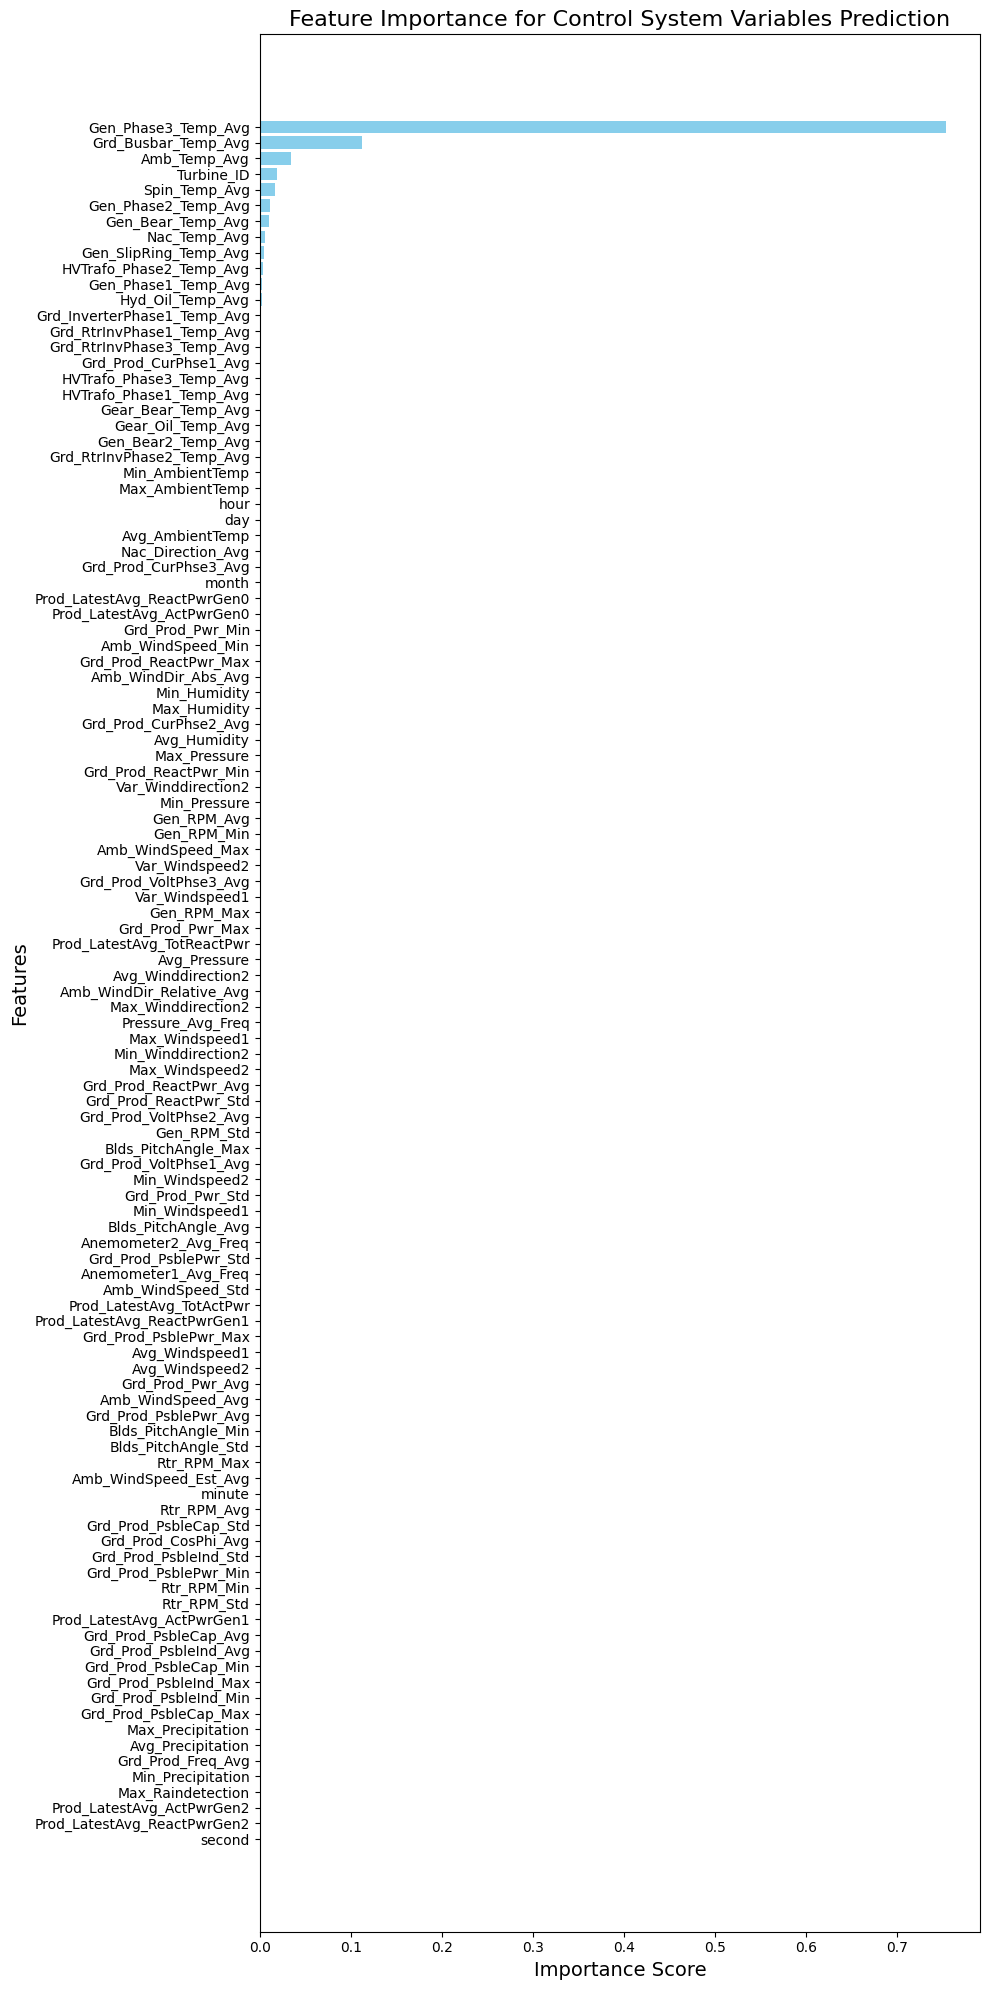

In [21]:
#For Control System
#Target variables for prediction
targets = df_merged[['Cont_Top_Temp_Avg', 'Cont_Hub_Temp_Avg', 'Cont_VCP_Temp_Avg',
                     'Cont_VCP_ChokcoilTemp_Avg','Cont_VCP_WtrTemp_Avg']]

features = df_merged.drop(columns=targets.columns)

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

#Initialising the RandomForest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

predictions = rf_regressor.predict(X_test)

#Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

importances = rf_regressor.feature_importances_

#Convert the importances into a DataFrame 
feature_importances = pd.DataFrame({'feature': features.columns, 'importance': importances})

#Sort the DataFrame to find the most important features
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

#Plot feature importances.
plt.figure(figsize=(10, 20))  
plt.title('Feature Importance for Control System Variables Prediction', fontsize=16)
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.gca().invert_yaxis() 
plt.tight_layout() 
plt.show()